In [522]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st


In [523]:
mouse = pd.read_csv('data/Mouse_metadata.csv')
study = pd.read_csv('data/Study_results.csv')



In [524]:
#merged CSVs
pyma_df = pd.merge(mouse,study,on = 'Mouse ID', how = 'left')

pyma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [525]:
#counted # of mice 
pyma_df['Mouse ID'].count()



1893

In [526]:
# found duplicates based on mouse id and timepoint
pyma_dup = pyma_df[pyma_df.duplicated(subset = ['Mouse ID', 'Timepoint'],
                              keep = False)]

pyma_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [694]:
#drop duplicates
pyma_cleandf = pyma_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
#check to see if duplicates were dropped
pyma_cleandf[908:917]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2
921,h246,Ketapril,Male,13,30,0,45.000000,0


In [703]:

#dropped all data for mouse g989 
pyma_cleandf = pyma_df.loc[(pyma_df['Mouse ID']!='g989')]


In [704]:
# mouse count is changed by 5 entries
pyma_cleandf['Mouse ID'].count()

1880

In [705]:
#generate summary statistics of tumor volume by regimen
pyma_groupreg = pyma_cleandf.groupby(['Drug Regimen'])
#mean
meandrug = pyma_groupreg['Tumor Volume (mm3)'].mean()
#median
mediandrug = pyma_groupreg['Tumor Volume (mm3)'].median()
#variance
vardrug = pyma_groupreg['Tumor Volume (mm3)'].var()
#standard deviation
stddrug = pyma_groupreg['Tumor Volume (mm3)'].std()
#standard error of the mean
semdrug = pyma_groupreg['Tumor Volume (mm3)'].sem()

#combine into stats into summary 
drug_statssumm = pd.DataFrame({'Mean': meandrug,
                              'Median' : mediandrug,
                              'Variance': vardrug,
                              'Standard Deviation' : stddrug,
                              'SEM' : semdrug})

drug_statssumm

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [706]:
#using aggregation method - summary stats using single line of code
pyma_groupreg['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


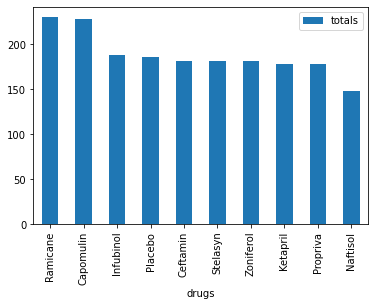

In [707]:
drugnames = pyma_cleandf['Drug Regimen'].unique()
drugtotals = pyma_cleandf['Drug Regimen'].value_counts()

# bar graph showing total measurements by drug regiment
df = pd.DataFrame({'drugs': drugnames, 
                  'totals': drugtotals})
drugmeasures = df.plot.bar(x='drugs', y = 'totals')



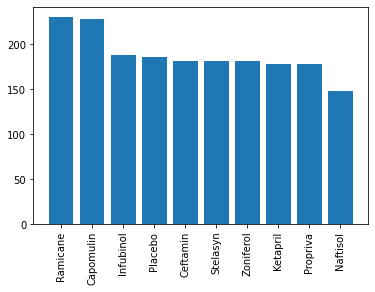

In [708]:
#using pyplot to show previous bargraph
plt.bar(drugnames,drugtotals)

#manipulate bar labels to show full-name
labels = [x for x in drugnames]

plt.xticks(labels, drugnames,rotation=90)

plt.show()

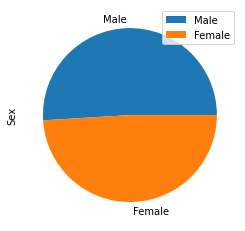

In [709]:
#creating series to plot
mousesex=pyma_cleandf['Sex'].value_counts()


dfms=pd.DataFrame(mousesex)

dfms.plot.pie(y=0)



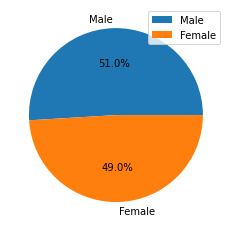

In [710]:
#pie chart using pyplot
sexes = pyma_cleandf['Sex'].unique()

#easily added percentages
plt.pie(mousesex,labels = sexes, autopct = '%1.1f%%')
#include legend
plt.legend(loc = 'best')

plt.show()

In [711]:
#new dataframe with only selected drug types in regiment

pyma_bydrug = pyma_cleandf.loc[((pyma_cleandf['Drug Regimen'] =='Ramicane') | (pyma_cleandf['Drug Regimen'] =='Infubinol') | (pyma_cleandf['Drug Regimen'] =='Ceftamin') | (pyma_cleandf['Drug Regimen'] =='Capomulin'))]



In [712]:
#create dataframe that shows the last occurence of a Mouse's ID corresponding with it's final Timepoint

max_timepoint = pyma_bydrug.groupby('Mouse ID')['Timepoint']

max_time = pd.DataFrame(max_timepoint.max())

mouse_endpoint = pd.merge(max_time,pyma_bydrug, how = 'outer', on = 'Mouse ID')

mouse_endpoint

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
809,z581,45,Infubinol,Female,24,25,25,54.316407,2
810,z581,45,Infubinol,Female,24,25,30,56.286750,2
811,z581,45,Infubinol,Female,24,25,35,58.628399,3
812,z581,45,Infubinol,Female,24,25,40,60.053740,3


In [713]:
treatments = pyma_bydrug['Drug Regimen'].unique()

tumorvols = []


for e in treatments: 
    
    by_treat = mouse_endpoint.loc[(mouse_endpoint['Drug Regimen']== e)]
    final_time=by_treat.loc[(by_treat['Timepoint_x']==by_treat['Timepoint_y'])]
   
    tumorvols.append(final_time['Tumor Volume (mm3)'])
    
  
    #grouped the dataframe with end timepoints/tumor volume by drug regimen 

mouse_endgroup = mouse_endpoint.groupby(['Drug Regimen'])
    #created quartiles for each drug group using tumor volume data 

quartiles = mouse_endgroup['Tumor Volume (mm3)'].quantile([0.25,0.5,.75])



In [714]:
quartiles

Drug Regimen      
Capomulin     0.25    37.685933
              0.50    41.557809
              0.75    45.000000
Ceftamin      0.25    47.208427
              0.50    51.776157
              0.75    56.801438
Infubinol     0.25    47.312353
              0.50    51.820584
              0.75    57.314444
Ramicane      0.25    36.674635
              0.50    40.673236
              0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [715]:
cap_lowq = quartiles['Capomulin', 0.25]
cap_highq = quartiles['Capomulin', 0.75]
cap_iqr = cap_highq - cap_lowq 

cap_lowb = cap_lowq - (1.5*cap_iqr)

cap_highb = cap_highq + (1.5*cap_iqr)

print(f'values below {cap_lowb} could be outliers in Capomulin group.')
print(f'values above {cap_highb} could be outliers in Capomulin group.')

values below 26.714832162499995 could be outliers in Capomulin group.
values above 55.9711007025 could be outliers in Capomulin group.


In [716]:
ram_lowq = quartiles['Ramicane', 0.25]
ram_highq = quartiles['Ramicane', 0.75]
ram_iqr = ram_highq - ram_lowq 

ram_lowb = ram_lowq - (1.5*ram_iqr)

ram_highb = ram_highq + (1.5*ram_iqr)

print(f'values below {ram_lowb} could be outliers in Ramicane group.')
print(f'values above {ram_highb} could be outliers in Ramicane group.')

values below 24.1865864625 could be outliers in Ramicane group.
values above 57.488048122500004 could be outliers in Ramicane group.


In [717]:
inf_lowq = quartiles['Infubinol', 0.25]
inf_highq = quartiles['Infubinol', 0.75]
inf_iqr = inf_highq - inf_lowq 

inf_lowb = inf_lowq - (1.5*inf_iqr)

inf_highb = inf_highq + (1.5*inf_iqr)

print(f'values below {inf_lowb} could be outliers in Infubinol group.')
print(f'values above {inf_highb} could be outliers in Infubinol group.')

values below 32.309217298749985 could be outliers in Infubinol group.
values above 72.31757996875001 could be outliers in Infubinol group.


In [718]:
cef_lowq = quartiles['Ceftamin', 0.25]
cef_highq = quartiles['Ceftamin', 0.75]
cef_iqr = cef_highq - inf_lowq 

cef_lowb = cef_lowq - (1.5*inf_iqr)

cef_highb = cef_highq + (1.5*inf_iqr)

print(f'values below {cef_lowb} could be outliers in Ceftamin group.')
print(f'values above {cef_highb} could be outliers in Ceftamin group.')

values below 32.20529111124999 could be outliers in Ceftamin group.
values above 71.80457357125002 could be outliers in Ceftamin group.


In [719]:
tumorvols

[39     38.407618
 49     43.047543
 59     38.810366
 76     32.978522
 139    38.342008
 149    33.397653
 166    37.311236
 186    40.659006
 235    29.128472
 247    33.562402
 257    36.374510
 324    31.560470
 334    36.134852
 354    22.050126
 442    30.564625
 474    31.095335
 537    45.220869
 545    36.561652
 569    37.225650
 576    43.419381
 612    30.276232
 650    40.667713
 708    43.166373
 763    44.183451
 803    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 96     38.982878
 113    38.939633
 205    30.485985
 215    37.074024
 225    40.159220
 276    47.685963
 286    37.311846
 296    38.125164
 304    38.753265
 399    41.483008
 432    38.846876
 452    28.430964
 464    33.329098
 549    46.539206
 559    32.377357
 586    41.581521
 602    23.343598
 622    40.728578
 632    34.455298
 660    31.023923
 681    40.658124
 684    39.952347
 718    36.041047
 729    28.484033
 783    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 9      67.973

{'whiskers': [<matplotlib.lines.Line2D at 0x2312ffbc8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2312ffbcfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2312ffbc5c0>,
 'medians': [<matplotlib.lines.Line2D at 0x2312ffca710>,
 'fliers': [<matplotlib.lines.Line2D at 0x2312ffcaa90>,
 'means': []}

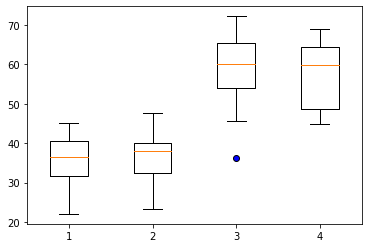

In [720]:
flierprops=dict(markerfacecolor='blue')
plt.boxplot(tumorvols,flierprops = flierprops)




In [741]:
# located by capomulin 
capo_mouse = pyma_df.loc[(pyma_df['Drug Regimen']=='Capomulin')]
#choose mouse ID 

c_mouse = 'r157'

#locate data for c_mouse
mouse157 = capo_mouse.loc[(capo_mouse['Mouse ID']==c_mouse)]


In [739]:
mouse157

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


In [740]:
times = mouse157['Timepoint']
tumor157 = mouse157['Tumor Volume (mm3)']

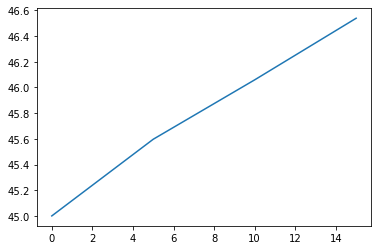

In [742]:
plt.plot(times, tumor157)

In [753]:
pyma_bydrug_grp = pyma_bydrug.groupby(['Drug Regimen','Weight (g)'])



In [770]:
tumor_weight = pyma_bydrug_grp.mean()

capo_tumorweight = tumor_weight.xs(key='Capomulin').reset_index()


capoweight = capo_tumorweight['Weight (g)']


capotumorvol = capo_tumorweight['Tumor Volume (mm3)']

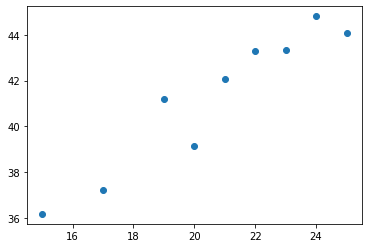

In [771]:
plt.scatter(capoweight,capotumorvol)